In [1]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import time

df = pd.read_csv('BitcoinHeistData.csv')

In [2]:
# General info on the datatypes of the data
df.info()

# The count column may confuse the computer with the count() function, so lets rename it

df.rename(columns={'count':'counted'},inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
address      object
year         int64
day          int64
length       int64
weight       float64
count        int64
looped       int64
neighbors    int64
income       float64
label        object
dtypes: float64(2), int64(6), object(2)
memory usage: 222.5+ MB


In [3]:

# Check for missing values. False => No missing values

df.isnull().values.any()

False

In [4]:
# To see how skewed the dataset is, value_counts() can be used to see the number of individual elements in a series.
df.label.value_counts()

white                          2875284
paduaCryptoWall                  12390
montrealCryptoLocker              9315
princetonCerber                   9223
princetonLocky                    6625
montrealCryptXXX                  2419
montrealNoobCrypt                  483
montrealDMALockerv3                354
montrealDMALocker                  251
montrealSamSam                      62
montrealGlobeImposter               55
montrealCryptoTorLocker2015         55
montrealGlobev3                     34
montrealGlobe                       32
montrealWannaCry                    28
montrealRazy                        13
montrealAPT                         11
paduaKeRanger                       10
montrealFlyper                       9
montrealXTPLocker                    8
montrealVenusLocker                  7
montrealCryptConsole                 7
montrealXLockerv5.0                  7
montrealEDA2                         6
montrealJigSaw                       4
paduaJigsaw              

<BarContainer object of 2 artists>

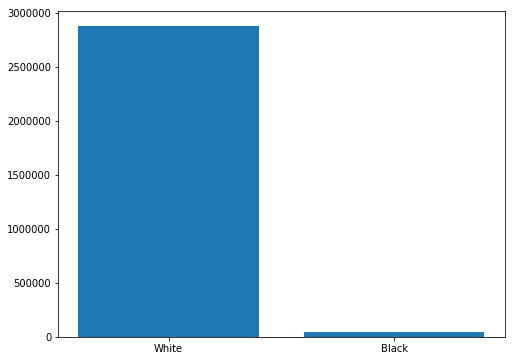

In [5]:
label_white = []
label_black = []
for element in df.label:
    if element == 'white':
        label_white.append(element)
    else:
        label_black.append(element)

x_ax = ['White','Black']
y_ax = [len(label_white),len(label_black)]

# print('White Labels:',len(label_white))
# print('Black Labels:',len(label_black))

plt.figure(figsize = (8,6))
plt.bar(x_ax,y_ax)

In [6]:
# There are a lot of different unique malware types, but in a holistic view, the label can be viewed as 'white' (not associated with malware) or not (associated with malware). The value_counts(normalize=True) returns the normalized values for each unique element in the series, and it shows that ~98.58% of the dataset is labeled white, while the remaining 1.42% is not white. This menas that approximately 2,875,284 of 2,916,697 instances are white while 41,413 instances are not. Most of the addresses are white. The dataset is quite skewed, and is prone to errors because the dataset will very likely overfit the algorithm.

df.label.value_counts(normalize=True)*100

white                          98.580140
paduaCryptoWall                 0.424796
montrealCryptoLocker            0.319368
princetonCerber                 0.316214
princetonLocky                  0.227140
montrealCryptXXX                0.082936
montrealNoobCrypt               0.016560
montrealDMALockerv3             0.012137
montrealDMALocker               0.008606
montrealSamSam                  0.002126
montrealGlobeImposter           0.001886
montrealCryptoTorLocker2015     0.001886
montrealGlobev3                 0.001166
montrealGlobe                   0.001097
montrealWannaCry                0.000960
montrealRazy                    0.000446
montrealAPT                     0.000377
paduaKeRanger                   0.000343
montrealFlyper                  0.000309
montrealXTPLocker               0.000274
montrealVenusLocker             0.000240
montrealCryptConsole            0.000240
montrealXLockerv5.0             0.000240
montrealEDA2                    0.000206
montrealJigSaw  

In [8]:
df.head()

,address,year,day,length,weight,counted,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky


C:\Users\shadow\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(30000000.0, 49964398238996.0)

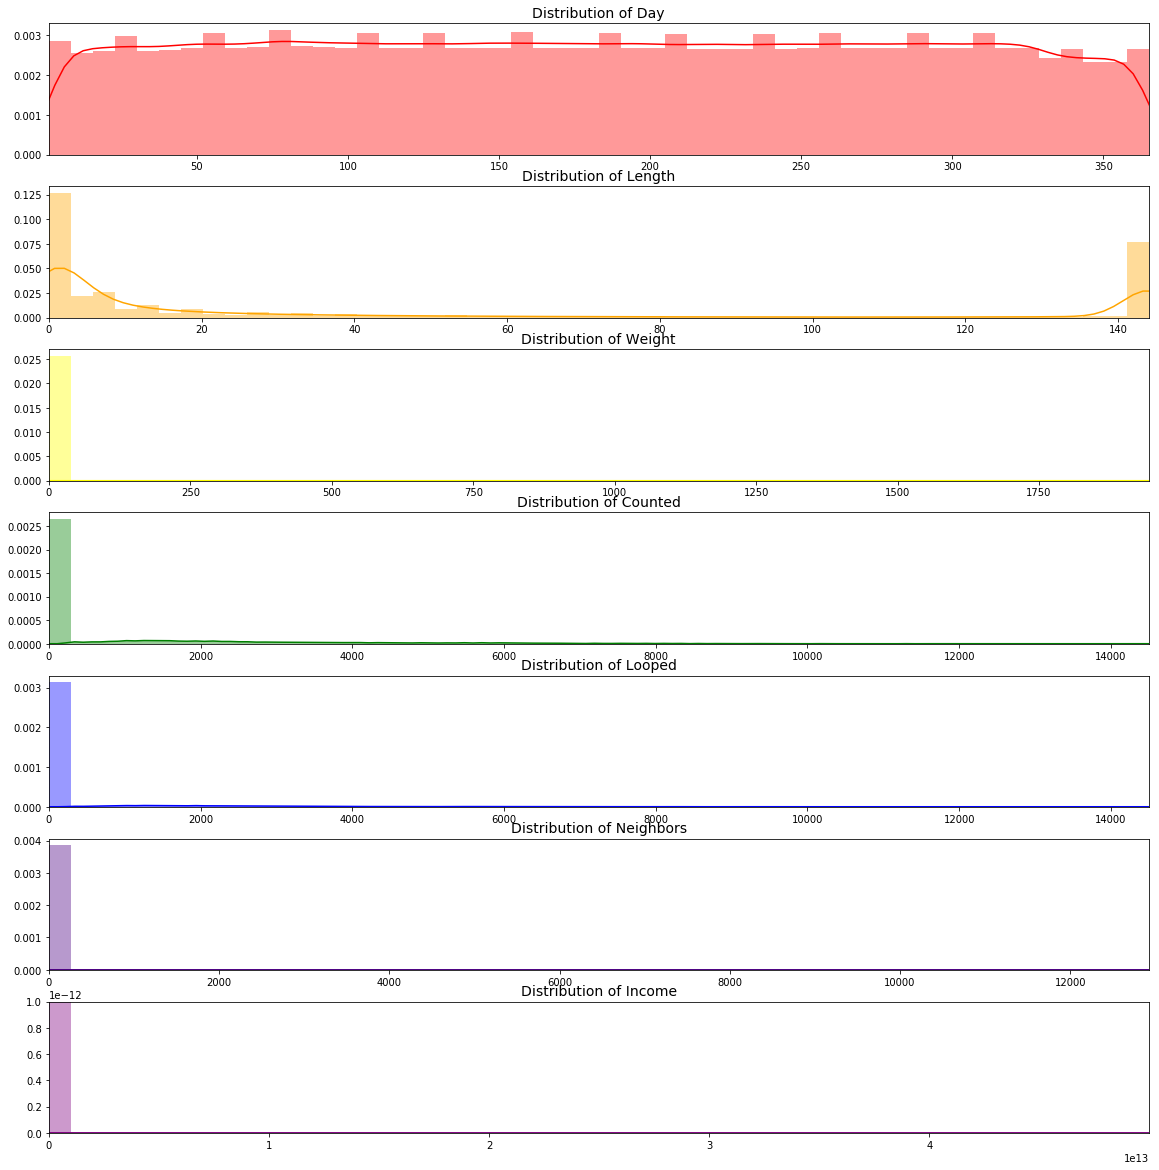

In [9]:
# distplot to show how the data is distributed.
fig, ax = plt.subplots(7, 1,figsize=(16,16))
fig.tight_layout()

day_val = df.day.values
length_val = df.length.values
weight_val = df.weight.values
counted_val = df.counted.values
looped_val = df.looped.values
neighbors_val = df.neighbors.values
income_val = df.income.values

sns.distplot(day_val, ax=ax[0],color='red')
ax[0].set_title('Distribution of Day', fontsize=14)
ax[0].set_xlim([min(day_val), max(day_val)])

sns.distplot(length_val, ax=ax[1],color='orange')
ax[1].set_title('Distribution of Length', fontsize=14)
ax[1].set_xlim([min(length_val), max(length_val)])

sns.distplot(weight_val, ax=ax[2],color='yellow')
ax[2].set_title('Distribution of Weight', fontsize=14)
ax[2].set_xlim([min(weight_val), max(weight_val)])

sns.distplot(counted_val, ax=ax[3],color='green')
ax[3].set_title('Distribution of Counted', fontsize=14)
ax[3].set_xlim([min(counted_val), max(counted_val)])

sns.distplot(looped_val, ax=ax[4],color='blue')
ax[4].set_title('Distribution of Looped', fontsize=14)
ax[4].set_xlim([min(looped_val), max(looped_val)])

sns.distplot(neighbors_val, ax=ax[5],color='indigo')
ax[5].set_title('Distribution of Neighbors', fontsize=14)
ax[5].set_xlim([min(neighbors_val), max(neighbors_val)])

sns.distplot(income_val, ax=ax[6],color='purple')
ax[6].set_title('Distribution of Income', fontsize=14)
ax[6].set_xlim([min(income_val), max(income_val)])

In [10]:
# Most of the data are heavily skewed toward the right. Then lets check the correlation between each features.

corr = df.corr()
corr

,year,day,length,weight,counted,looped,neighbors,income
year,1.000000,-0.040307,0.163101,0.011827,0.285415,0.113164,-0.000876,-0.020535
day,-0.040307,1.000000,0.011919,0.000864,-0.002538,0.002566,0.000181,0.002628
length,0.163101,0.011919,1.000000,0.000228,0.703467,0.411609,0.031523,0.000488
weight,0.011827,0.000864,0.000228,1.000000,0.022313,0.061646,0.691963,0.069774
counted,0.285415,-0.002538,0.703467,0.022313,1.000000,0.560370,0.025441,-0.003635
looped,0.113164,0.002566,0.411609,0.061646,0.560370,1.000000,0.052826,0.002551
neighbors,-0.000876,0.000181,0.031523,0.691963,0.025441,0.052826,1.000000,0.138966
income,-0.020535,0.002628,0.000488,0.069774,-0.003635,0.002551,0.138966,1.000000


In [11]:
# Convert object datatypes to categorical.

df.label = pd.Categorical(df.label)
df.address = pd.Categorical(df.address)

In [12]:
# Since label is a categorical variable, it cannot be shown in the correlation chart. Therefore, encode it to 0 (Black) or 1 (White) (on a test dataframe to prevent the original dataset from being changed.)

test = df.copy()
test_encode = pd.get_dummies(test.label)
test_encode.white

0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
          ..
2916667    1
2916668    1
2916669    1
2916670    1
2916671    1
2916672    1
2916673    1
2916674    1
2916675    1
2916676    1
2916677    1
2916678    1
2916679    1
2916680    1
2916681    1
2916682    1
2916683    1
2916684    1
2916685    1
2916686    1
2916687    1
2916688    1
2916689    1
2916690    1
2916691    1
2916692    1
2916693    1
2916694    1
2916695    1
2916696    1
Name: white, Length: 2916697, dtype: uint8

In [13]:
# Check the test dataframe

test['label_bw'] = test_encode.white
test.drop('label',axis=1,inplace=True)
test.head()

,address,year,day,length,weight,counted,looped,neighbors,income,label_bw
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,0
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,0
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,0
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,0
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,0


In [14]:
# Correlation matrix with the label_bw

corr_test = test.corr()
corr_test

,year,day,length,weight,counted,looped,neighbors,income,label_bw
year,1.000000,-0.040307,0.163101,0.011827,0.285415,0.113164,-0.000876,-0.020535,-0.021367
day,-0.040307,1.000000,0.011919,0.000864,-0.002538,0.002566,0.000181,0.002628,0.008097
length,0.163101,0.011919,1.000000,0.000228,0.703467,0.411609,0.031523,0.000488,0.006860
weight,0.011827,0.000864,0.000228,1.000000,0.022313,0.061646,0.691963,0.069774,-0.002676
counted,0.285415,-0.002538,0.703467,0.022313,1.000000,0.560370,0.025441,-0.003635,0.008654
looped,0.113164,0.002566,0.411609,0.061646,0.560370,1.000000,0.052826,0.002551,0.017810
neighbors,-0.000876,0.000181,0.031523,0.691963,0.025441,0.052826,1.000000,0.138966,0.000872
income,-0.020535,0.002628,0.000488,0.069774,-0.003635,0.002551,0.138966,1.000000,0.002716
label_bw,-0.021367,0.008097,0.006860,-0.002676,0.008654,0.017810,0.000872,0.002716,1.000000


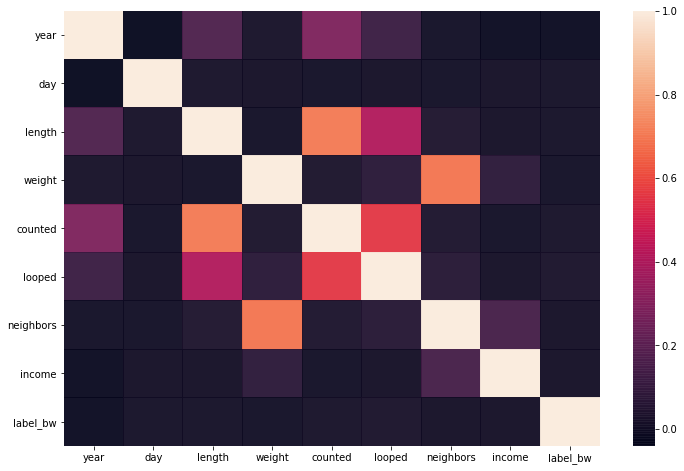

In [15]:
# According to the heatmap and the correlation matrix, there seems to be no obvious correlation between the features and the label. However, 'looped' has the highest relative positive correlation to the label, and year has the highest relative negative correlation to the label. However, the correlations are highly likely to be incorrect, because the dataset is very imbalanced. So lets dig deeper.

plt.figure(figsize = (12,8))
sns.heatmap(corr_test,alpha=0.95)

In [16]:
# test = df.copy()
# test.head()

In [17]:
# Before splitting the dataset, it should be scaled or encoded so that the algorithm will be less prone to errors such as overfitting. Besides the usual feature scaling approach, the variables can be encoded to binary values and the correlation can be checked.

test_different = test.copy()
test_different.head()

,address,year,day,length,weight,counted,looped,neighbors,income,label_bw
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,0
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,0
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,0
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,0
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,0


In [18]:
test_different.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
address      category
year         int64
day          int64
length       int64
weight       float64
counted      int64
looped       int64
neighbors    int64
income       float64
label_bw     uint8
dtypes: category(1), float64(2), int64(6), uint8(1)
memory usage: 292.0 MB


In [19]:

# Likewise, to get a better understanding of the neighbors feature, value_counts() can be used to see how many different unique values exist and the counts for each of them. Most transactions have 2 neighbors, and as the count shows a decreasing trend with increasing number of neighbors
test_different.neighbors.value_counts()

#//

test_different.neighbors.describe()

# median value is 2. But since the values are very widely spread out, it may affect the results when the algorithm is trained. Therefore, the variable can be encoded to a smaller range -> bigger than 2 or smaller than 2.

#//

test_different.loc[test_different['neighbors'] <= 2, 'neighbors'] = 1  # Less or equal to 2 neighbors -> 1
test_different.loc[test_different['neighbors'] > 2, 'neighbors'] = 0   #        More than 2 neighbors -> 0

#//

# Likewise, repeat for columns length, counted, and looped. Income column can be efficiently scaled later, while the year and day columns may lose their meanings if encoded to binary.

test_different.length.describe() # Median at 8. Therefore encode variables to more or less than 8.

#//

test_different.loc[test_different['length'] <= 8, 'length'] = 1  # Less or equal to 8 length -> 1
test_different.loc[test_different['length'] > 8, 'length'] = 0   #        More than 8 length -> 0

#//

test_different.counted.describe() # Median at 1. Therefore, encode variables to more or less than 1.

#//

test_different.loc[test_different['counted'] <= 1, 'counted'] = 1  # Less or equal to 1 counted -> 1
test_different.loc[test_different['counted'] > 1, 'counted'] = 0   #        More than 1 counted -> 0

#//

test_different.looped.describe() # Median at 0, Therfore, encode variables to either 0 or not.

#//

test_different.loc[test_different['looped'] <= 1 , 'looped'] = 1  # Less or equal to 0 looped -> 1
test_different.loc[test_different['looped'] > 1, 'looped'] = 0  #        More than 0 looped -> 0

In [20]:
corr_test_different = test_different.corr()
corr_test_different

,year,day,length,weight,counted,looped,neighbors,income,label_bw
year,1.000000,-0.040307,-0.060817,0.011827,-0.012424,-0.025320,0.003984,-0.020535,-0.021367
day,-0.040307,1.000000,-0.004824,0.000864,-0.005459,0.001711,-0.000469,0.002628,0.008097
length,-0.060817,-0.004824,1.000000,0.022547,0.532903,0.323781,0.076761,-0.005094,-0.010743
weight,0.011827,0.000864,0.022547,1.000000,-0.015373,-0.054161,-0.132865,0.069774,-0.002676
counted,-0.012424,-0.005459,0.532903,-0.015373,1.000000,0.428439,0.228734,0.002282,0.002883
looped,-0.025320,0.001711,0.323781,-0.054161,0.428439,1.000000,0.304792,-0.003071,-0.014182
neighbors,0.003984,-0.000469,0.076761,-0.132865,0.228734,0.304792,1.000000,-0.011306,0.030160
income,-0.020535,0.002628,-0.005094,0.069774,0.002282,-0.003071,-0.011306,1.000000,0.002716
label_bw,-0.021367,0.008097,-0.010743,-0.002676,0.002883,-0.014182,0.030160,0.002716,1.000000


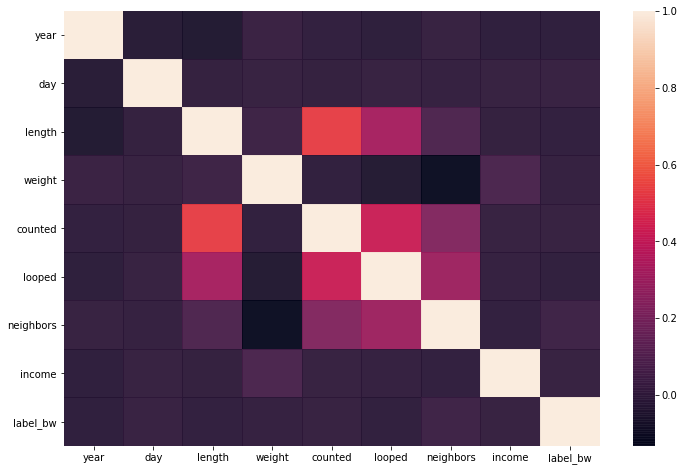

In [21]:
plt.figure(figsize = (12,8))
sns.heatmap(corr_test_different,alpha=0.95)

# It seems encoding the data into binary features doesn't provide much additional insight to the correlation between the features. It was a good try though.

# //
# (From the future- Comment after running the entire code)
# Although I didn't realize the value behind this work in the moment, in hindsight, this process gave the best scores on classifier algorithms.
# //

In [22]:
# For features such as year and day, scaling may not be needed as those features represent dates. However, for other features such as length, weight, counted, looped, neighbors, and income, the values vary widely, and feature scaling should be used.

# As for normalization or standardization, normalization 'shifts' values to a range between 0 and 1, while standardization does not bound its range, has zero mean, and is less prone to outliers. In this dataset, there exists a lot of outliers, so standarization should be preferred.

# //
# (From the future- Comment after running the entire code)
# After some tedious feature engineering, the best scores for the classifier algorithms were achieved when the test_different dataframe was used.
# //

test = test_different

from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

scale_columns = ['length','weight','counted','income']

test['s_length'] = rob_scaler.fit_transform(test['length'].values.reshape(-1,1))
test['s_weight'] = rob_scaler.fit_transform(test['weight'].values.reshape(-1,1))
test['s_counted'] = rob_scaler.fit_transform(test['counted'].values.reshape(-1,1))

test['s_income'] = rob_scaler.fit_transform(test['income'].values.reshape(-1,1))

test.drop(scale_columns,axis=1,inplace=True)

# test['s_looped'] = rob_scaler.fit_transform(test['looped'].values.reshape(-1,1))
# test['s_neighbors'] = rob_scaler.fit_transform(test['neighbors'].values.reshape(-1,1))

# test.drop(['looped','neighbors'],axis=1,inplace=True)

test.head()

,address,year,day,looped,neighbors,label_bw,s_length,s_weight,s_counted,s_income
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,1,1,0,-1.0,-0.280856,0.0,-0.108673
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,1,1,0,-1.0,-0.290257,0.0,-0.108728
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,1,1,0,0.0,0.871623,0.0,0.000002
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,1,1,0,-1.0,-0.286001,0.0,-0.140042
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,1,1,0,-1.0,-0.205879,-1.0,0.000002


In [23]:
# 'looped' and 'neighbors' doesn't scale well with the robustscaler, and the transformed data seems to be just as wide-ranged as the non-transformed 

In [24]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

test['s_looped'] = std_scaler.fit_transform(test['looped'].values.reshape(-1,1))
test['s_neighbors'] = std_scaler.fit_transform(test['neighbors'].values.reshape(-1,1))

test.drop(['looped','neighbors'],axis=1,inplace=True)

# ###
# scale_columns = ['length','weight','counted','income']

# test['s_length'] = std_scaler.fit_transform(test['length'].values.reshape(-1,1))
# test['s_weight'] = std_scaler.fit_transform(test['weight'].values.reshape(-1,1))
# test['s_counted'] = std_scaler.fit_transform(test['counted'].values.reshape(-1,1))

# test['s_income'] = std_scaler.fit_transform(test['income'].values.reshape(-1,1))

# test.drop(scale_columns,axis=1,inplace=True)
# ###

# test.head()

C:\Users\shadow\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\shadow\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\shadow\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\shadow\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [25]:
# Reorder columns to mirror that of the original dataframe.
reorder = ['address', 'year', 'day', 's_length', 's_weight',
       's_counted', 's_looped', 's_neighbors', 's_income', 'label_bw']
test = test[reorder]
test.head()

,address,year,day,s_length,s_weight,s_counted,s_looped,s_neighbors,s_income,label_bw
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,-1.0,-0.280856,0.0,0.369259,0.242062,-0.108673,0
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,-1.0,-0.290257,0.0,0.369259,0.242062,-0.108728,0
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0.0,0.871623,0.0,0.369259,0.242062,0.000002,0
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,-1.0,-0.286001,0.0,0.369259,0.242062,-0.140042,0
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,-1.0,-0.205879,-1.0,0.369259,0.242062,0.000002,0


In [26]:
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=41)

for train_index, test_index in split.split(test, test.label_bw):
    strat_train_set = test.loc[train_index]
    strat_test_set = test.loc[test_index]

In [27]:

strat_train_set.label_bw.value_counts()#/len(strat_train_set)

1    2587755
0      37272
Name: label_bw, dtype: int64

In [28]:

strat_test_set.label_bw.value_counts()#/len(strat_test_set)

1    287529
0      4141
Name: label_bw, dtype: int64

In [29]:
test = test.sample(frac=1)

# Match the number of heist and non-heist dataset
# heist_df = test.loc[test['label_bw'] == 0]
heist_df = test.loc[test['label_bw'] == 0][:500]

# 37272 + 4141 = 41413 (to equally split the new dataframe with balanced data)
# non_heist_df = test.loc[test['label_bw'] == 1][:41413]
non_heist_df = test.loc[test['label_bw'] == 1][:500]


normal_distributed_df = pd.concat([heist_df, non_heist_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=41)

new_df.head()

,address,year,day,s_length,s_weight,s_counted,s_looped,s_neighbors,s_income,label_bw
8304,16JNaKgyMpQr8sa1aXF6dV4qNZHwnqEuaX,2013,313,0.0,0.871623,0.0,0.369259,0.242062,0.869837,0
1464958,1E6CL8qUJZFmoc4qEgJzA7DC4Cstfz7pEA,2014,339,0.0,2.033787,-1.0,0.369259,-4.131179,-0.002457,1
1779801,3AYvUVDrx41p1gUrjQB2tte6sSpij8YrNR,2015,289,0.0,0.290541,0.0,0.369259,0.242062,1.107927,1
4214,14ABSBzZBQyYH8S6qSJc2bgQ9ViEKWnC49,2014,110,0.0,0.871623,0.0,0.369259,0.242062,0.021758,0
1458405,1Q9N1uFeV9vVn7UELbGiKJiGFsfGNc3fiU,2014,332,0.0,0.290541,0.0,0.369259,0.242062,-0.109146,1


<BarContainer object of 2 artists>

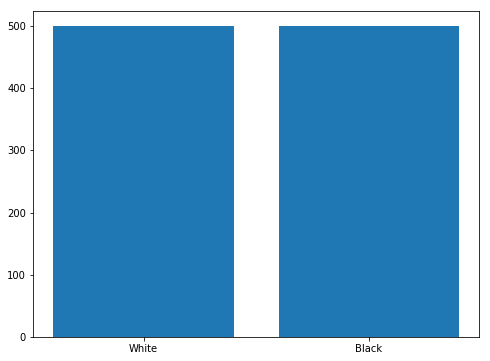

In [30]:
# Check if the new dataframe new_df is balanced.

# print(new_df.label_bw.value_counts()/len(new_df.label_bw))

bw_white = []
bw_black = []
for element in new_df.label_bw:
    if element == 1:
        bw_white.append(element)
    else:
        bw_black.append(element)

x_ax = ['White','Black']
y_ax = [len(bw_white),len(bw_black)]

plt.figure(figsize = (8,6))
plt.bar(x_ax,y_ax)

In [31]:
new_corr = new_df.corr()
new_corr

,year,day,s_length,s_weight,s_counted,s_looped,s_neighbors,s_income,label_bw
year,1.000000,-0.104645,-0.111600,-0.058744,0.015909,0.025883,0.073258,-0.066652,-0.156721
day,-0.104645,1.000000,0.001029,-0.022483,0.008167,0.033182,0.006431,-0.017725,0.025397
s_length,-0.111600,0.001029,1.000000,0.061209,0.514793,0.277749,0.124738,0.018820,0.002003
s_weight,-0.058744,-0.022483,0.061209,1.000000,-0.055572,-0.158135,-0.228459,0.939341,0.010929
s_counted,0.015909,0.008167,0.514793,-0.055572,1.000000,0.335306,0.291290,-0.029228,0.030402
s_looped,0.025883,0.033182,0.277749,-0.158135,0.335306,1.000000,0.293883,-0.106862,-0.018983
s_neighbors,0.073258,0.006431,0.124738,-0.228459,0.291290,0.293883,1.000000,-0.111624,0.133257
s_income,-0.066652,-0.017725,0.018820,0.939341,-0.029228,-0.106862,-0.111624,1.000000,0.045740
label_bw,-0.156721,0.025397,0.002003,0.010929,0.030402,-0.018983,0.133257,0.045740,1.000000


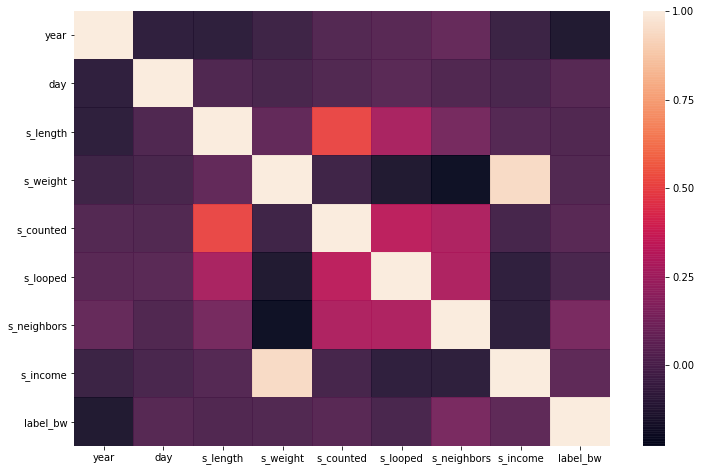

In [32]:
plt.figure(figsize = (12,8))
sns.heatmap(new_corr,alpha=0.95)

In [33]:
new_df.drop('address',axis=1,inplace=True)

X = new_df.drop('label_bw', axis=1)
y = new_df['label_bw']

In [34]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [35]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [36]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNN Classifier": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

In [37]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    # training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    training_score = cross_val_score(classifier, X_test, y_test, cv=5)

    print(key,":", round(training_score.mean(), 2) * 100, "%")

C:\Users\shadow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shadow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shadow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shadow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shadow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

LogisiticRegression : 49.0 %
KNN Classifier : 50.0 %
Support Vector Classifier : 53.0 %
DecisionTreeClassifier : 71.0 %
RandomForestClassifier : 68.0 %


C:\Users\shadow\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [38]:
### This cell may take very long to run! Took me 8.8min

# Pick the best classifier RandomForestClassifier and do some parameter tuning.

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Instantiate the grid search model
grid_search = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

rf_clf = grid_search.best_estimator_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  3.5min finished


In [39]:
rf_clf.score(X_test,y_test)

0.78

In [40]:
from sklearn.model_selection import cross_val_predict

rf_pred = cross_val_predict(rf_clf, X_test, y_test, cv=5)

In [41]:
from sklearn.metrics import roc_auc_score

print('ROC Area Under Curve Score: ', roc_auc_score(y_test, rf_pred))

ROC Area Under Curve Score:  0.6939775910364147


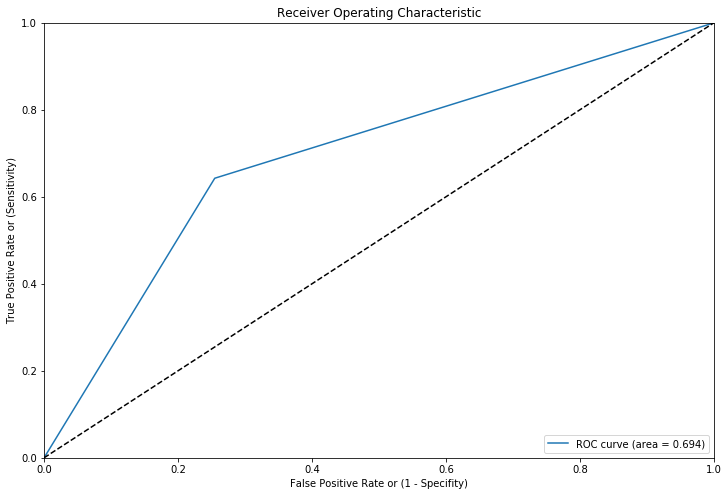

In [42]:
from sklearn.metrics import roc_curve

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, rf_pred)

# Plot ROC curve
plt.figure(figsize = (12,8))

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, rf_pred))
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [43]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = rf_pred

print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Recall Score: 0.64
Precision Score: 0.71
F1 Score: 0.67
Accuracy Score: 0.69
